In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset_path = "/content/drive/MyDrive/DATA SET /Student Mental Health Analysis During Online Learning.csv"

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [ ]:
data = pd.read_csv(dataset_path)
data



,Name,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,Aarav,Male,15,Class 8,7.1,8.9,9.3,Medium,No,Same
1,Meera,Female,25,MSc,3.3,5.0,0.2,Medium,No,Same
2,Ishaan,Male,20,BTech,9.5,5.4,6.2,Medium,No,Same
3,Aditya,Male,20,BA,10.8,5.6,5.5,High,Yes,Same
4,Anika,Female,17,Class 11,2.8,5.4,3.1,Medium,Yes,Same
...,...,...,...,...,...,...,...,...,...,...
995,Diya,Female,26,MA,11.3,6.8,9.1,Medium,No,Same
996,Aarav,Male,20,BTech,5.5,6.7,6.8,Low,Yes,Same
997,Myra,Female,15,Class 9,7.1,4.1,1.9,Low,Yes,Declined
998,Myra,Female,20,BA,4.4,7.5,4.5,Medium,No,Improved


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Name                          1000 non-null   object 
 1   Gender                        1000 non-null   object 
 2   Age                           1000 non-null   int64  
 3   Education Level               1000 non-null   object 
 4   Screen Time (hrs/day)         1000 non-null   float64
 5   Sleep Duration (hrs)          1000 non-null   float64
 6   Physical Activity (hrs/week)  1000 non-null   float64
 7   Stress Level                  1000 non-null   object 
 8   Anxious Before Exams          1000 non-null   object 
 9   Academic Performance Change   1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.3+ KB


In [ ]:
data.describe()

,Age,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week)
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.342000,6.909200,6.450800,5.017600
std,3.459914,2.907106,1.466407,2.930344
min,15.000000,2.000000,4.000000,0.000000
25%,17.000000,4.400000,5.100000,2.600000
50%,20.000000,6.900000,6.500000,5.000000
75%,23.000000,9.500000,7.700000,7.600000
max,26.000000,12.000000,9.000000,10.000000


In [ ]:
data.dtypes

,0
Name,object
Gender,object
Age,int64
Education Level,object
Screen Time (hrs/day),float64
Sleep Duration (hrs),float64
Physical Activity (hrs/week),float64
Stress Level,object
Anxious Before Exams,object
Academic Performance Change,object


In [ ]:
data.isna().sum()

,0
Name,0
Gender,0
Age,0
Education Level,0
Screen Time (hrs/day),0
Sleep Duration (hrs),0
Physical Activity (hrs/week),0
Stress Level,0
Anxious Before Exams,0
Academic Performance Change,0


In [ ]:
# Hapus kolom tidak relevan
data =data.drop('Name', axis=1)


# EDA

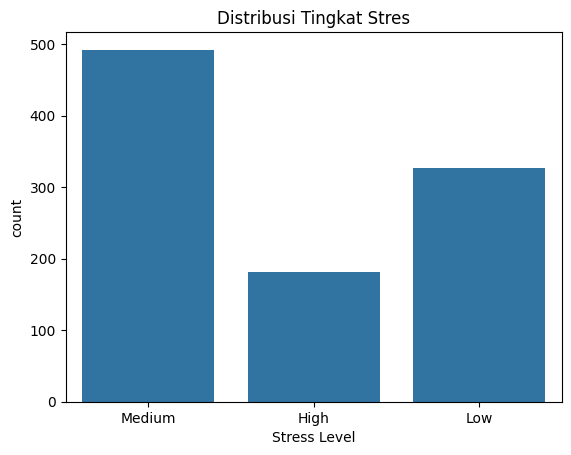

In [ ]:
# Cek distribusi kelas target
sns.countplot(data=data, x='Stress Level')
plt.title('Distribusi Tingkat Stres')
plt.show()




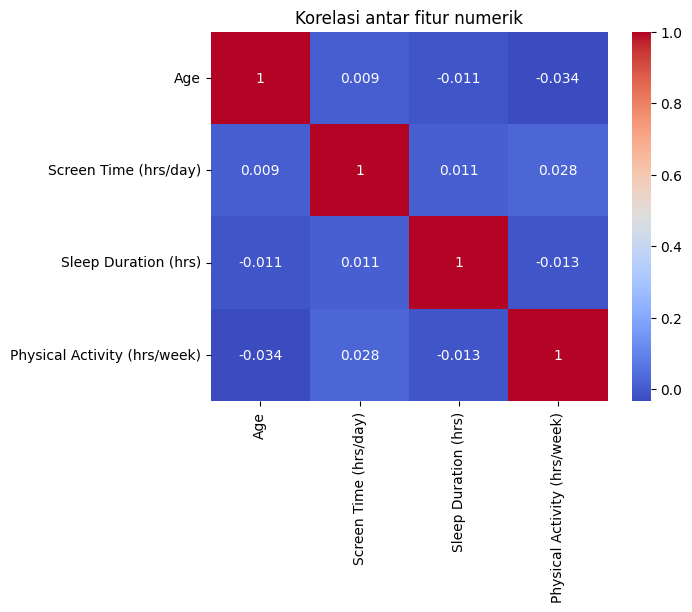

In [ ]:
# Korelasi antar fitur numerik
numerik_cols = data.select_dtypes(include=np.number)
sns.heatmap(numerik_cols.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()


# Encoding dan Normalisasi Data

In [ ]:
# Import LabelEncoder dan StandardScaler
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode fitur kategorikal
label_enc = LabelEncoder()
data['Gender'] = label_enc.fit_transform(data['Gender'])
data['Education Level'] = label_enc.fit_transform(data['Education Level'])
data['Anxious Before Exams'] = label_enc.fit_transform(data['Anxious Before Exams'])
data['Academic Performance Change'] = label_enc.fit_transform(data['Academic Performance Change'])
data['Stress Level'] = label_enc.fit_transform(data['Stress Level'])  # Target

# Normalisasi fitur numerik
scaler = StandardScaler()
num_features = ['Screen Time (hrs/day)', 'Sleep Duration (hrs)', 'Physical Activity (hrs/week)']
data[num_features] = scaler.fit_transform(data[num_features])
print("🔍 Data setelah preprocessing:")
display(data.head())




🔍 Data setelah preprocessing:


,Gender,Age,Education Level,Screen Time (hrs/day),Sleep Duration (hrs),Physical Activity (hrs/week),Stress Level,Anxious Before Exams,Academic Performance Change
0,1,15,6,0.065665,1.671040,1.462130,2,0,2
1,0,25,9,-1.242131,-0.989852,-1.644862,2,0,2
2,1,20,2,0.891641,-0.716940,0.403704,2,0,2
3,1,20,0,1.339045,-0.580484,0.164705,0,1,2
4,0,17,4,-1.414209,-0.716940,-0.654722,2,1,2


# Spilt Data

In [ ]:
# Import fungsi split
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = data.drop('Stress Level', axis=1)
y = data['Stress Level']

# Split data menjadi train dan test (dengan stratifikasi)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Tampilkan ukuran data
print(f"Jumlah data latih: {X_train.shape[0]} baris")
print(f"Jumlah data uji  : {X_test.shape[0]} baris")

# Tampilkan distribusi label
print("\nDistribusi label di data latih:")
print(y_train.value_counts())

print("\nDistribusi label di data uji:")
print(y_test.value_counts())


Jumlah data latih: 800 baris
Jumlah data uji  : 200 baris

Distribusi label di data latih:
Stress Level
2    394
1    261
0    145
Name: count, dtype: int64

Distribusi label di data uji:
Stress Level
2    98
1    66
0    36
Name: count, dtype: int64


# Model Decision Tree

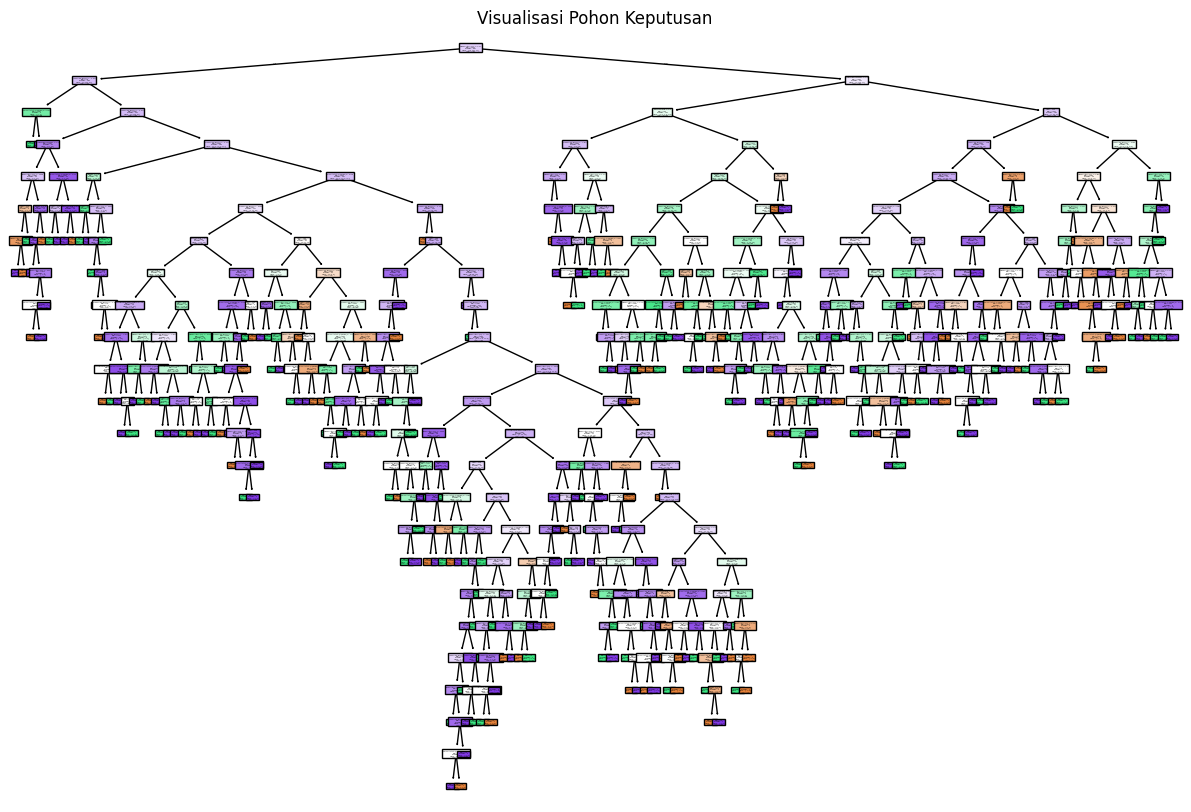

In [ ]:
# Buat dan latih model Decision Tree
model_dt = DecisionTreeClassifier(random_state=42)
model_dt.fit(X_train, y_train)

# Visualisasi pohon keputusan
plt.figure(figsize=(15,10))
plot_tree(model_dt, filled=True, feature_names=X.columns, class_names=['Low','Medium','High'])
plt.title('Visualisasi Pohon Keputusan')
plt.show()


# Evaluasi

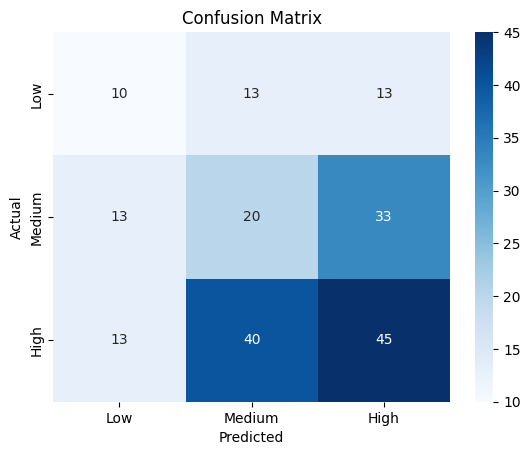

Accuracy: 0.375
Classification Report:
               precision    recall  f1-score   support

         Low       0.28      0.28      0.28        36
      Medium       0.27      0.30      0.29        66
        High       0.49      0.46      0.48        98

    accuracy                           0.38       200
   macro avg       0.35      0.35      0.35       200
weighted avg       0.38      0.38      0.38       200



In [ ]:
# Prediksi dan evaluasi
y_pred = model_dt.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low', 'Medium', 'High'], yticklabels=['Low', 'Medium', 'High'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['Low','Medium','High']))
